In [ ]:
import numpy as np
from scipy.signal import hilbert
import matplotlib.pyplot as plt

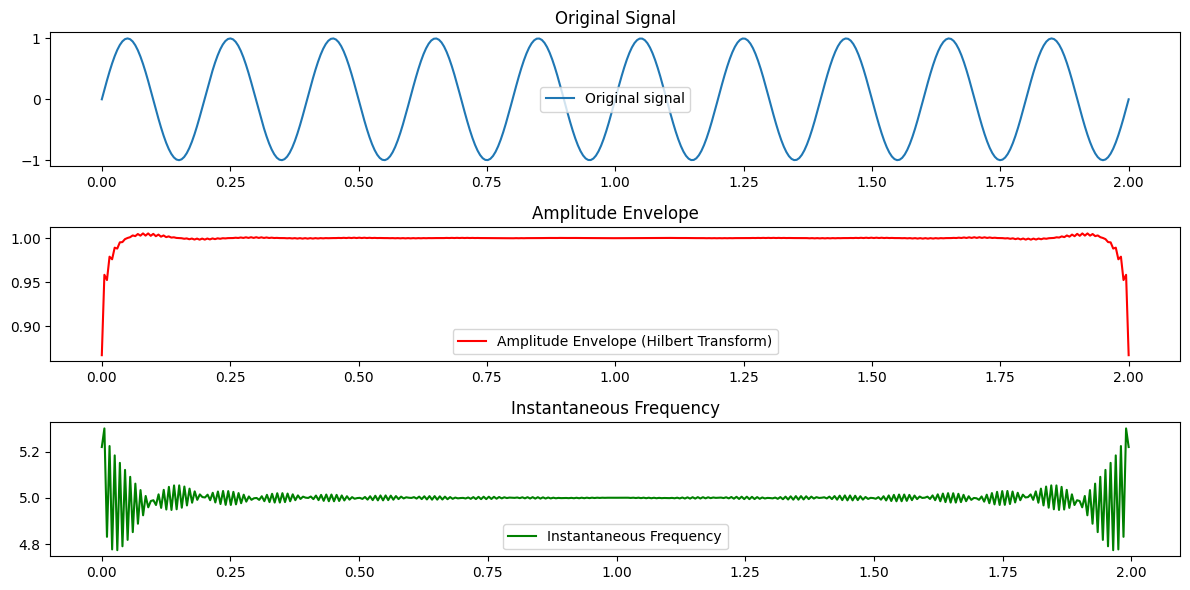

In [4]:

# Generate a signal (e.g., a sine wave)
t = np.linspace(0, 2.0, 400)  # 0 to 2 seconds, 400 points
signal = np.sin(2.0 * np.pi * 5.0 * t)  # 5 Hz sine wave

# Compute the analytic signal
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0 * np.pi * np.diff(t))

# Plot the original signal and its Hilbert transform
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Original signal')
plt.title('Original Signal')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, amplitude_envelope, label='Amplitude Envelope (Hilbert Transform)', color='red')
plt.title('Amplitude Envelope')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t[:-1], instantaneous_frequency, label='Instantaneous Frequency', color='green')
plt.title('Instantaneous Frequency')
plt.legend()

plt.tight_layout()
plt.show()

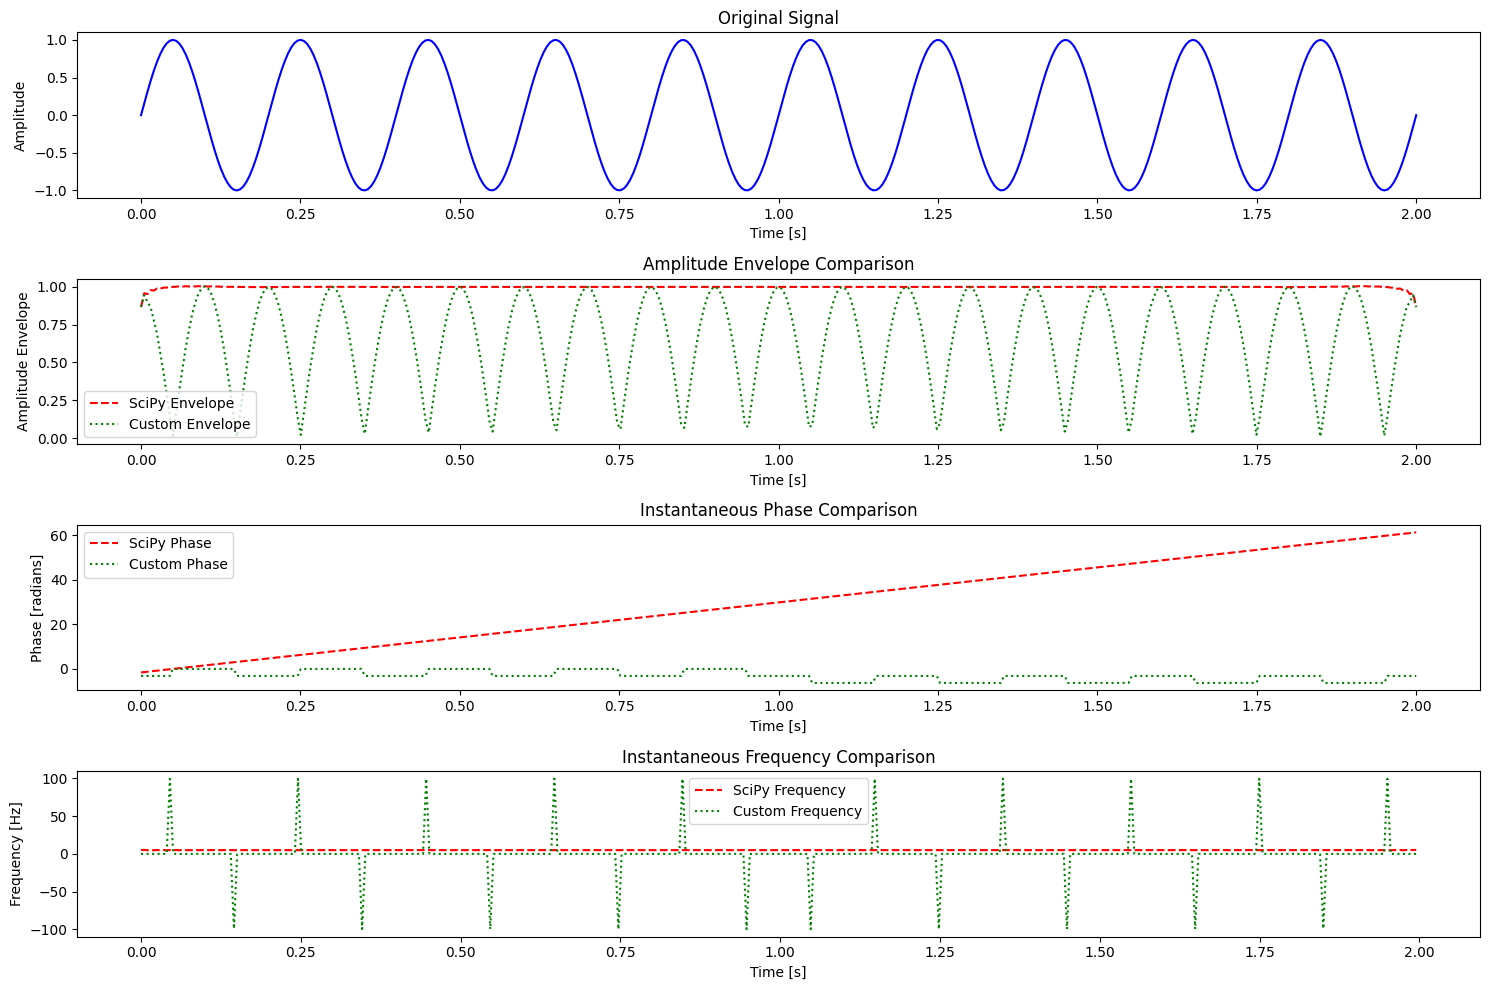

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Generate a signal (e.g., a sine wave)
t = np.linspace(0, 2.0, 400)  # 0 to 2 seconds, 400 points
signal = np.sin(2.0 * np.pi * 5.0 * t)  # 5 Hz sine wave

# Convert signal to PyTorch tensor for custom Hilbert transform
signal_tensor = torch.tensor(signal, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Shape (1, 1, N)

# Define the custom Hilbert transform function
def custom_hilbert_transform(x):
    batchsize = x.shape[0]
    N = x.size(-1)
    
    # Compute the Fourier transform of the input
    x_ft = torch.fft.fft(x, n=N)
    
    # Create the Hilbert transform multiplier
    freqs = torch.fft.fftfreq(N).to(x.device)
    H = -1j * torch.sign(freqs)
    H = H.reshape(1, 1, N)
    
    # Apply the Hilbert transform in the frequency domain
    x_ht_ft = x_ft * H
    
    # Multiply relevant frequency modes with weights (identity weights for comparison)
    out_ft = torch.zeros(batchsize, 1, N, device=x.device, dtype=torch.cfloat)
    out_ft[:, :, :] = x_ht_ft
    
    # Return to the spatial domain
    x_ht = torch.fft.ifft(out_ft, n=N)
    return x_ht

# Apply the custom Hilbert transform
analytic_signal_custom = custom_hilbert_transform(signal_tensor).squeeze().numpy()
amplitude_envelope_custom = np.abs(analytic_signal_custom)
instantaneous_phase_custom = np.unwrap(np.angle(analytic_signal_custom))
instantaneous_frequency_custom = np.diff(instantaneous_phase_custom) / (2.0 * np.pi * np.diff(t))

# Compute the analytic signal using SciPy's Hilbert transform
analytic_signal_scipy = hilbert(signal)
amplitude_envelope_scipy = np.abs(analytic_signal_scipy)
instantaneous_phase_scipy = np.unwrap(np.angle(analytic_signal_scipy))
instantaneous_frequency_scipy = np.diff(instantaneous_phase_scipy) / (2.0 * np.pi * np.diff(t))

# Plot comparisons
plt.figure(figsize=(15, 10))

# Original Signal
plt.subplot(4, 1, 1)
plt.plot(t, signal, label="Original Signal", color='b')
plt.title("Original Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Amplitude Envelope
plt.subplot(4, 1, 2)
plt.plot(t, amplitude_envelope_scipy, label="SciPy Envelope", color='r', linestyle='--')
plt.plot(t, amplitude_envelope_custom, label="Custom Envelope", color='g', linestyle=':')
plt.title("Amplitude Envelope Comparison")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude Envelope")
plt.legend()

# Instantaneous Phase
plt.subplot(4, 1, 3)
plt.plot(t, instantaneous_phase_scipy, label="SciPy Phase", color='r', linestyle='--')
plt.plot(t, instantaneous_phase_custom, label="Custom Phase", color='g', linestyle=':')
plt.title("Instantaneous Phase Comparison")
plt.xlabel("Time [s]")
plt.ylabel("Phase [radians]")
plt.legend()

# Instantaneous Frequency
plt.subplot(4, 1, 4)
plt.plot(t[:-1], instantaneous_frequency_scipy, label="SciPy Frequency", color='r', linestyle='--')
plt.plot(t[:-1], instantaneous_frequency_custom, label="Custom Frequency", color='g', linestyle=':')
plt.title("Instantaneous Frequency Comparison")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.legend()

plt.tight_layout()
plt.show()
